In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
#Converting numeric columns from percentage to absolute

for col in ["exports","health","imports"]:
    df[col]=df[col]/100*df.gdpp

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


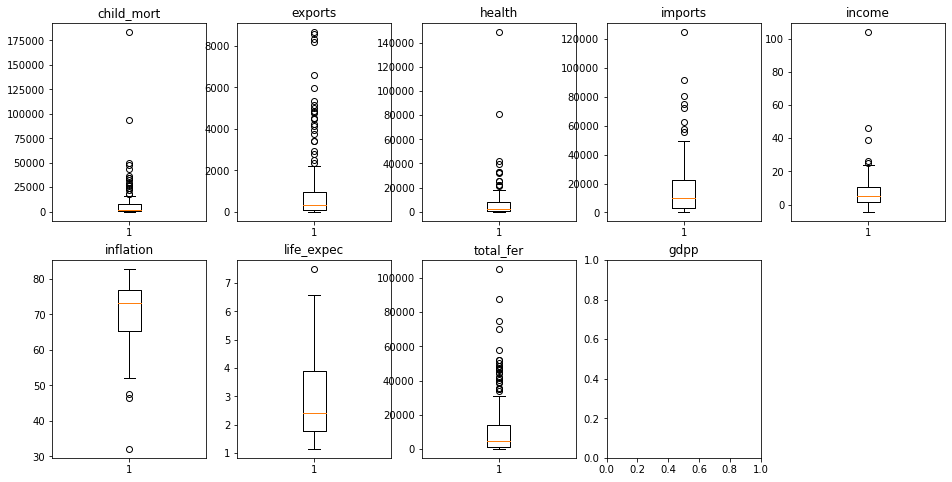

In [9]:
i=1
plt.figure(figsize=[16,8])
for col in df.columns[1:]:
    plt.boxplot(x=col,data=df)
    plt.subplot(2,5,i)
    plt.title(col)
    i+=1
plt.show()    

In [10]:
#Outlier
for col in df.columns[1:]:
    print(col,"\nMax \t:{}\t\t\tMin \t:{}\nQ99 \t:{}\t\tQ01 \t:{}\n".format(max(df[col]),min(df[col]),np.quantile(df[col],0.99),np.quantile(df[col],0.01)))
    print("-"*100)

child_mort 
Max 	:208.0			Min 	:2.6
Q99 	:153.40000000000003		Q01 	:2.8

----------------------------------------------------------------------------------------------------
exports 
Max 	:183750.0			Min 	:1.07692
Q99 	:64794.26000000014		Q01 	:22.243716

----------------------------------------------------------------------------------------------------
health 
Max 	:8663.6			Min 	:12.821200000000001
Q99 	:8410.3304		Q01 	:17.009362000000003

----------------------------------------------------------------------------------------------------
imports 
Max 	:149100.0			Min 	:0.651092
Q99 	:55371.39000000013		Q01 	:104.90964000000002

----------------------------------------------------------------------------------------------------
income 
Max 	:125000			Min 	:609
Q99 	:84374.00000000003		Q01 	:742.24

----------------------------------------------------------------------------------------------------
inflation 
Max 	:104.0			Min 	:-4.21
Q99 	:41.47800000000002		Q01 	:-2.34879999999999

In [11]:
for col_name in df.columns[1:]:
    low=np.quantile(df[col_name],0.01)
    high=np.quantile(df[col_name],0.99)
    df[col_name]=np.where(df[col_name]>high,high,df[col_name])
    df[col_name]=np.where(df[col_name]<low,low,df[col_name])

In [12]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12757.456527
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17429.755235
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [13]:
#Outlier
for col in df.columns[1:]:
    print(col,"\nMax \t:{}\t\t\tMin \t:{}\nQ99 \t:{}\t\tQ01 \t:{}\n".format(max(df[col]),min(df[col]),np.quantile(df[col],0.95),np.quantile(df[col],0.05)))
    print("-"*100)

child_mort 
Max 	:153.40000000000003			Min 	:2.8
Q99 	:116.0		Q01 	:3.46

----------------------------------------------------------------------------------------------------
exports 
Max 	:64794.26000000014			Min 	:22.243716
Q99 	:31385.09999999997		Q01 	:70.4688

----------------------------------------------------------------------------------------------------
health 
Max 	:8410.3304			Min 	:17.009362000000003
Q99 	:4966.700999999998		Q01 	:26.715920000000004

----------------------------------------------------------------------------------------------------
imports 
Max 	:55371.39000000013			Min 	:104.90964000000002
Q99 	:24241.55999999997		Q01 	:169.281

----------------------------------------------------------------------------------------------------
income 
Max 	:84374.00000000003			Min 	:742.24
Q99 	:48289.999999999956		Q01 	:1213.0

----------------------------------------------------------------------------------------------------
inflation 
Max 	:41.47800000000002			Min 

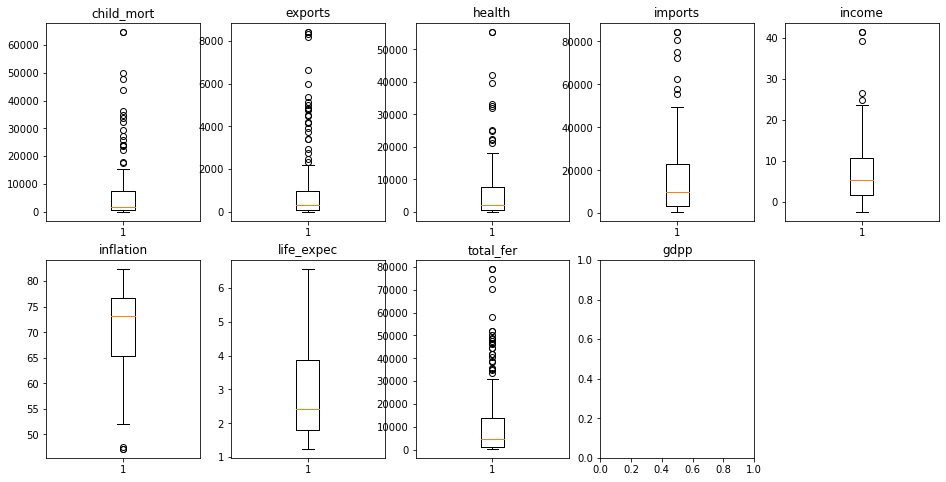

In [14]:
i=1
plt.figure(figsize=[16,8])
for col in df.columns[1:]:
    plt.boxplot(x=col,data=df)
    plt.subplot(2,5,i)
    plt.title(col)
    i+=1
plt.show()

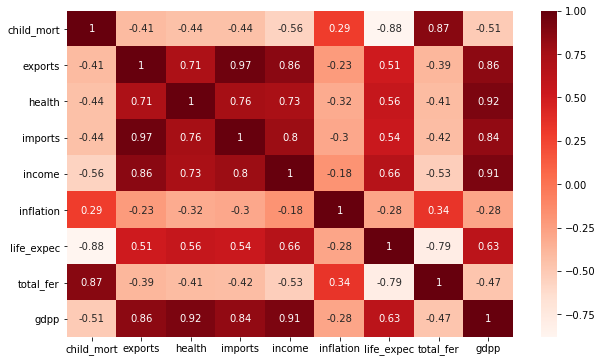

In [15]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(),annot=True,cmap="Reds")
plt.show()

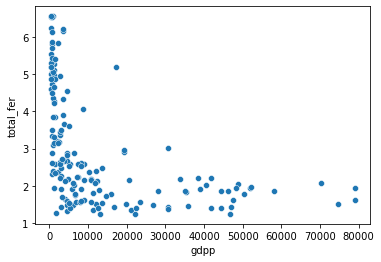

In [16]:
sns.scatterplot(x="gdpp",y="total_fer",data=df)
plt.show()

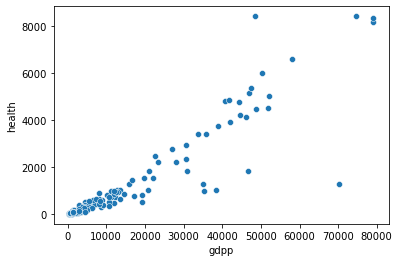

In [17]:
sns.scatterplot(x="gdpp",y="health",data=df)
plt.show()

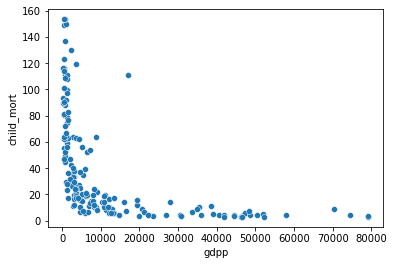

In [18]:
sns.scatterplot(x="gdpp",y="child_mort",data=df)
plt.show()

In [19]:
new_df=df.drop("country",axis=1)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
Kmeans=KMeans(n_clusters=3)
Kmeans.fit(new_df)

KMeans(n_clusters=3)

In [22]:
Kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [23]:
new_df["ClusterID"]=Kmeans.labels_
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


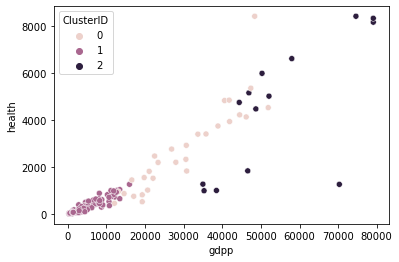

In [25]:
sns.scatterplot(x="gdpp",y="health",data=new_df,hue="ClusterID")
plt.show()

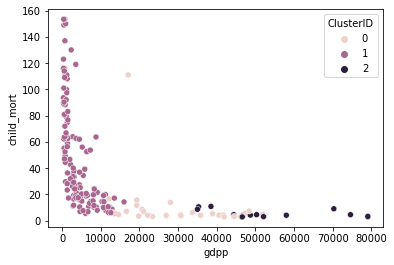

In [26]:
sns.scatterplot(x="gdpp",y="child_mort",data=new_df,hue="ClusterID")
plt.show()

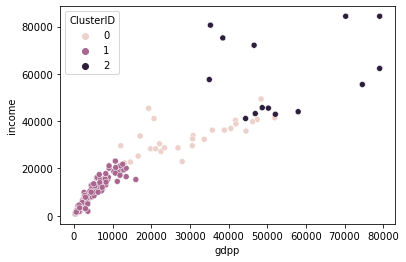

In [27]:
sns.scatterplot(x="gdpp",y="income",data=new_df,hue="ClusterID")
plt.show()

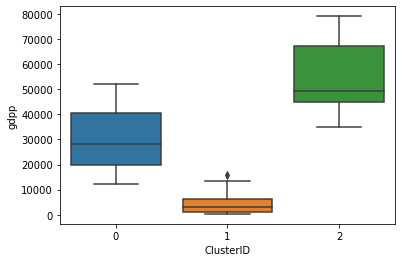

In [28]:
sns.boxplot(x="ClusterID",y="gdpp",data=new_df)
plt.show()

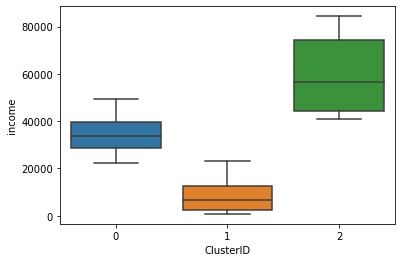

In [29]:
sns.boxplot(x="ClusterID",y="income",data=new_df)
plt.show()

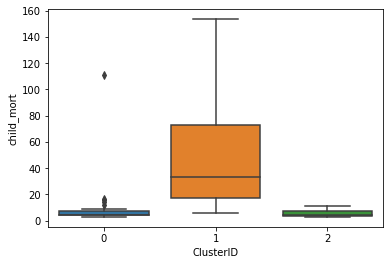

In [30]:
sns.boxplot(x="ClusterID",y="child_mort",data=new_df)
plt.show()

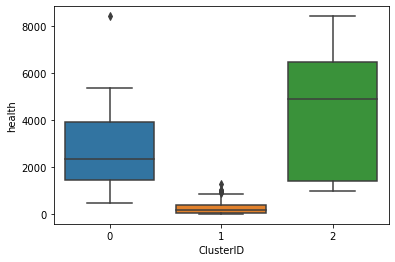

In [32]:
sns.boxplot(x="ClusterID",y="health",data=new_df)
plt.show()

In [33]:
scaler=StandardScaler()

In [34]:
scaled_df=scaler.fit_transform(df.drop("country",axis=1))

In [35]:
scaled_df=pd.DataFrame(scaled_df)

In [36]:
scaled_df.columns=list(new_df.columns)[:-1]

In [37]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [61]:
scaled_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,167.000000
mean,-4.786590e-17,1.010502e-16,1.595530e-17,-9.041337e-17,-3.191060e-17,-1.116871e-16,1.588882e-15,1.568938e-16,-5.584355e-17,0.634731
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,0.763310
min,-9.022102e-01,-5.725426e-01,-5.809334e-01,-6.141081e-01,-9.002438e-01,-1.257940e+00,-2.753796e+00,-1.138364e+00,-7.150535e-01,0.000000
25%,-7.621425e-01,-5.352087e-01,-5.464738e-01,-5.571244e-01,-7.542976e-01,-7.211609e-01,-6.267666e-01,-7.687982e-01,-6.576010e-01,0.000000
50%,-4.781521e-01,-4.183210e-01,-4.101778e-01,-4.075221e-01,-3.853490e-01,-2.590877e-01,2.878326e-01,-3.569046e-01,-4.659738e-01,0.000000
75%,6.218286e-01,6.498977e-02,-4.329444e-02,1.964821e-01,3.318805e-01,4.327313e-01,7.216810e-01,6.276215e-01,7.438032e-02,1.000000
max,2.968283e+00,5.118698e+00,4.120007e+00,5.269055e+00,3.771342e+00,4.398816e+00,1.374799e+00,2.424951e+00,3.817038e+00,2.000000


In [38]:
scaled_kmeans=Kmeans.fit(scaled_df)

In [39]:
scaled_kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [40]:
scaled_df["ClusterID"]=scaled_kmeans.labels_

In [41]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314,1
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,0
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483,0
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000,1
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079,0


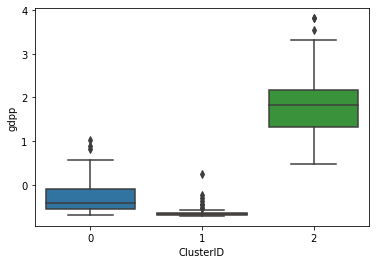

In [42]:
sns.boxplot(x="ClusterID",y="gdpp",data=scaled_df)
plt.show()

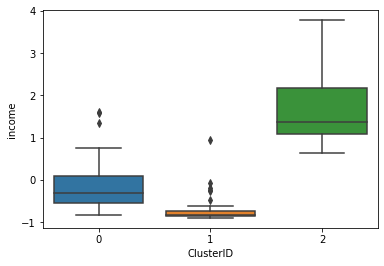

In [43]:
sns.boxplot(x="ClusterID",y="income",data=scaled_df)
plt.show()

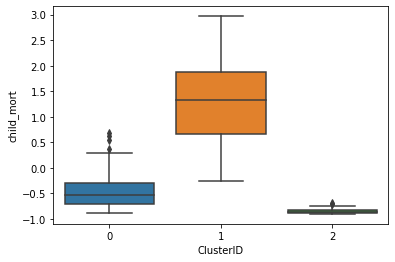

In [44]:
sns.boxplot(x="ClusterID",y="child_mort",data=scaled_df)
plt.show()

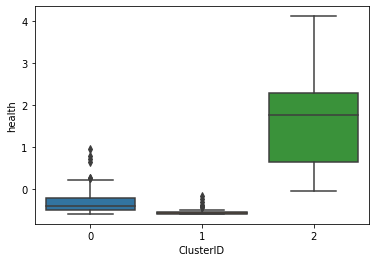

In [45]:
sns.boxplot(x="ClusterID",y="health",data=scaled_df)
plt.show()

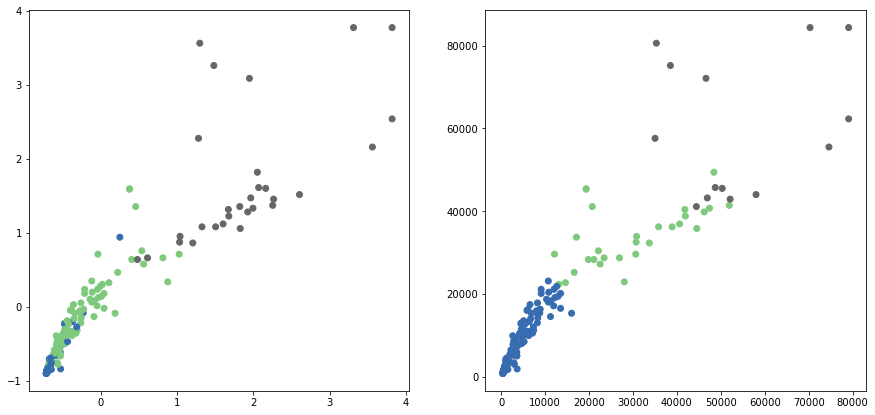

In [66]:
fig,ax=plt.subplots(1,2,figsize=[15,7],sharey=False,sharex=False)
ax[0].scatter(x="gdpp",y="income",data=scaled_df,c="ClusterID",cmap="Accent")
ax[1].scatter(x="gdpp",y="income",data=new_df,c="ClusterID",cmap="Accent")
plt.show()

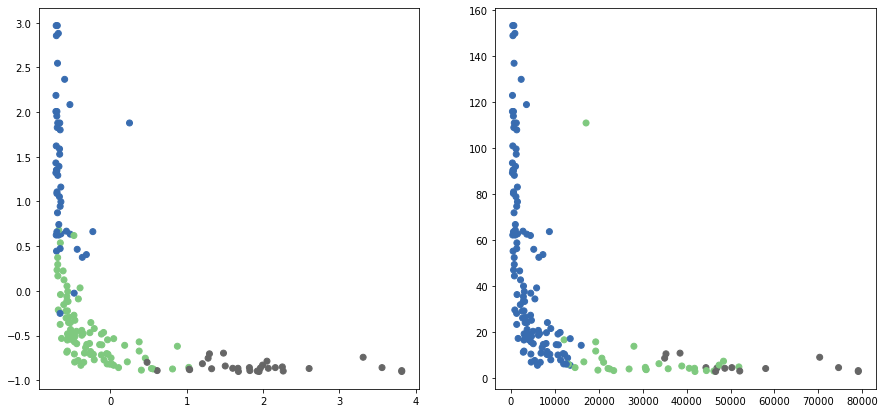

In [81]:
fig,ax=plt.subplots(1,2,figsize=[15,7],sharey=False,sharex=False)
ax[0].scatter(x="gdpp",y="child_mort",data=scaled_df,c="ClusterID",cmap="Accent")
ax[1].scatter(x="gdpp",y="child_mort",data=new_df,c="ClusterID",cmap="Accent")
plt.show()

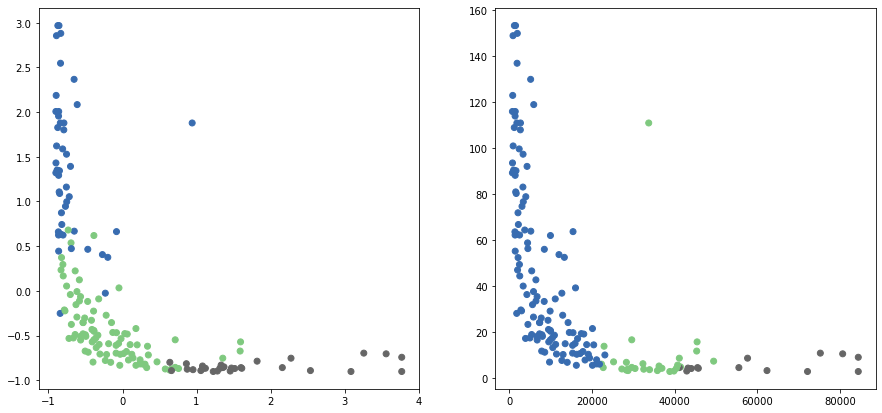

In [83]:
fig,ax=plt.subplots(1,2,figsize=[15,7],sharey=False,sharex=False)
ax[0].scatter(x="income",y="child_mort",data=scaled_df,c="ClusterID",cmap="Accent")
ax[1].scatter(x="income",y="child_mort",data=new_df,c="ClusterID",cmap="Accent")
plt.show()

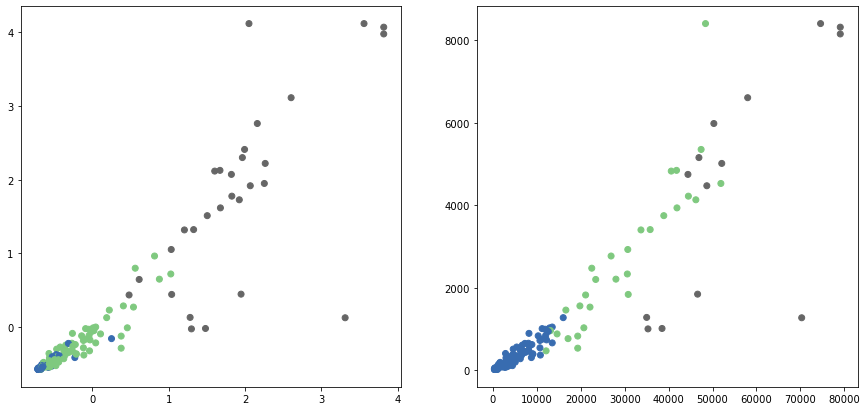

In [82]:
fig,ax=plt.subplots(1,2,figsize=[15,7],sharey=False,sharex=False)
ax[0].scatter(x="gdpp",y="health",data=scaled_df,c="ClusterID",cmap="Accent")
ax[1].scatter(x="gdpp",y="health",data=new_df,c="ClusterID",cmap="Accent")
plt.show()